<font face="Chalkboard" color="darkBlue" size=10>
Introduction to Locally Weighted Regression</font>

## What is linear regression?
**At a glance**, linear regression is a data analysis technique that predicts the value of unknown data by using another related and known data value. It mathematically models the unknown or dependent variable and the known or independent variable as a linear equation.

**Linear Regression models** Make predictions as a weighted combination of the input feauture values; the weights can be positive or negative. Expressed as an intuitive equation the idea is as follows:

$$\text{Predicted Value} = weight_1 \cdot \text{Feature}_1 + weight_2 \cdot \text{Feature}_2 + ... + weight_p \cdot \text{Feature}_p $$

<font color='darkblue' size=3pt>Message: In Machine Learning the "machine" is learning the weights based on iterative processes. Typically, the updates are based on a gradient descent method for minimizing an objective function, such as the sum of squared errors.</font>



## So, how do we solve for the weights ($β$) of linear regression?



**Linear regression models assumes that:**
$$\large y = X\cdot\beta +\sigma\epsilon $$

This equation can be transformed to: 

$$\large  X^Ty = X^TX\beta +\sigma X^T\epsilon$$

We want to solve for the weights(coefficients), $\beta$, assuming that $X^TX$ is invertible. resulting in:
$$\large \beta = (X^TX)^{-1}(X^Ty) - \sigma (X^TX)^{-1}X^T\epsilon$$

We take the expected value of this equation and obtain the expected value of the coeffcients:

$$\large \bar{\beta} = (X^TX)^{-1}(X^Ty)$$

Therefore, the predictions we make are(subsituting the "$\beta$" in the original equation with representation of "$\bar{\beta}$" ):

$$\large \hat{y} = X(X^TX)^{-1}(X^Ty)$$

## What is locally weighted linear regression(LOWESS)?
**Important Idea:** Trends and associations are generally nonlinear; however, *locally*, trends can be interpreted linearly.

**Intuitively, locally weighted linear regression does what its name suggests: for each data point $x$, a higher "weight" or "preference" is given to the points in the training set lying in the vicinity of $x$ than the points lying far away from $x$, effectively "localizing" the points around $x$ for regression**



> A "Kernal" will be used as a tool to dertermine the "weights" of each point, the **graph below** shows a visual intuation of using a mound-shaped kernel, such as a Gaussian, to help solve local linear regression problems



<figure>
<center>
<img  src="https://drive.google.com/uc?id=1rWcjflTXOfPsuKa71dr_ruqgqklfcSO_"  width="600px" >
<figcaption>Intuition for Locally Weighted Regression</figcaption></center>
</figure>


For every point that we set out to estimate ($x$), the LOESS algorithm must set up a linear regression model that will calculate the corresponding output ($\hat{y}$), using the neighbors of $x$ and a set of weights that signifies their importance.

### To summarize, Locally Weighted Linear regression makes predictions by:
>* Looking into the local neighborhood (similar input values) of the training examples close to $x$. Focus mainly on these examples, and fit a straight line through them.

>* Fit a line passing through the outputs $y$ in that neighborhood, and make a prediction at $x$.

>* By focusing on the local neighborhood of input points, we attribute these points to influence the output prediction the most, but the other points can also be weighted lesser and utilized for our prediction.



><font color='darkblue' size=2pt>Reference: https://aman.ai/cs229/locally-weighted-linear-regression/


<br>
 <br>  <br> 


## So, how do we solve for the weights ($β$) of locally weighted linear regression?

The main idea of linear regression is the assumption that:

$$\large y = X\cdot\beta +\sigma\epsilon $$

If we pre-multiply this equation with a matrix of weights (the "weights" of observation $i$ are on the main diagonal and the rest of the elements are 0) we get:

$$\large \text{diag}(W(i))y = \text{diag}(W(i))X\cdot\beta +\sigma \text{diag}(W(i))\epsilon $$

*We shall have $n$ different weight vectors because we have $n$ different observations.


**The following block is identical as of the above, related to solving for regular linear regression**


> **Linear regression models assumes that:**

> 


> $$\large y = X\cdot\beta +\sigma\epsilon $$

> This equation can be transformed to: 

> $$\large  X^Ty = X^TX\beta +\sigma X^T\epsilon$$

> We want to solve for the weights(coefficients),  $\beta$, assuming that $X^TX$ is invertible. resulting in:
> $$\large \beta = (X^TX)^{-1}(X^Ty) - \sigma (X^TX)^{-1}X^T\epsilon$$

> We take the expected value of this equation and obtain the expected value of the coeffcients:

> $$\large \bar{\beta} = (X^TX)^{-1}(X^Ty)$$

> Therefore, the predictions we make are(subsituting the "$\beta$" in the original equation with representation of "$\bar{\beta}$" ):

> $$\large \hat{y} = X(X^TX)^{-1}(X^Ty)$$

**Here is where Locally weighted linear regression differes:**

>For the locally weighted regression we have 

>$$\large \hat{y} = X(X^TWX)^{-1}(X^TWy)$$


The following animations are from the scikit-lego documentation:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1bQmo-j35etyEWt7Ce8TSo01YSOhZQBeY'width='800px'/>
<figcaption>Example of how weights work</figcaption></center>
</figure>


<figure>
<center>
<img src='https://drive.google.com/uc?id=19cIIGCSePtJbGVgRT6uWhcV2tNJKe9WG'width='800px'/>
<figcaption>Example of how locally weighted regression works</figcaption></center>
</figure>



## Kernels in LOWESS

> Kernels are the "Bump" or "mound shaped" functions in the animation. They are used to produce the "weights" used for each observation $x$. Different values of weights are visually highlighted as organge in the animation above as the kernel iterates through the data. 

Below are the parent functions of the kernels to produce the weights

1.   The Exponential Kernel

$$ K(x):= e^{-\frac{\|x\|^2}{2}}$$


2.   The Tricubic Kernel

$$ K(x):=\begin{cases}
(1-\|x\|^3)^3 \;\;\;if \;\;\; \|x\|<1 \\
0 \;\;\; \text{otherwise}
\end{cases}
$$

3.   The Epanechnikov Kernel

$$ K(x):=\begin{cases}
\frac{3}{4}(1-\|x\|^2) \;\;\;if \;\;\; \|x\|<1 \\
0 \;\;\; \text{otherwise}
\end{cases}
$$

3.   The Quartic Kernel

$$ K(x):=\begin{cases}
\frac{15}{16}(1-\|x\|^2)^2 \;\;\;if \;\;\; \|x\|<1 \\
0 \;\;\; \text{otherwise}
\end{cases}
$$

more about kernels: https://en.wikipedia.org/wiki/Kernel_(statistics)

# Example of Kernels

In [ ]:
# imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
mpl.rcParams['figure.dpi'] = 140
import numpy as np
from math import ceil
from scipy import linalg
from scipy.interpolate import interp1d
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import statsmodels.api as sm
from math import ceil
from sklearn.model_selection import train_test_split as tts, KFold
from sklearn.metrics import mean_squared_error as mse
import statsmodels.api as sm
from IPython.display import Image
from IPython.display import display
plt.style.use('seaborn-white')

In [ ]:
# The following are implementations of the kernels above
# note that they are built to deal with 2 scenarios: when input x is scalar(1 number) or vector 
# Gaussian Kernel
def Gaussian(x):
  if len(x.shape)==1: # to deal with scalars(1 num)
    d = np.abs(x)
  else: # if it is a vector
    d = np.sqrt(np.sum(x**2,axis=1)) # ecludian distance function
  return np.where(d>4,0,1/(np.sqrt(2*np.pi))*np.exp(-1/2*d**2))
  # Tricubic Kernel

In [ ]:
# Tricubic Kernel
def Tricubic(x):
  if len(x.shape)==1:
    d = np.abs(x)
  else:
    d = np.sqrt(np.sum(x**2,axis=1))
  return np.where(d>1,0,70/81*(1-d**3)**3)

In [ ]:
# Epanechnikov Kernel
def Epanechnikov(x):
  if len(x.shape)==1:
    d = np.abs(x)
  else:
    d = np.sqrt(np.sum(x**2,axis=1))
  return np.where(d>1,0,3/4*(1-d**2)) 

In [ ]:
# Quartic Kernel
def Quartic(x):
  if len(x.shape)==1:
    d = np.abs(x)
  else:
    d = np.sqrt(np.sum(x**2,axis=1))
  return np.where(d>1,0,15/16*(1-d**2)**2) 

In [ ]:
def kernel_function(xi,x0,kern, tau): # think of Xi being the points around x0, the center  
    # Tau regulates the width of the mound shaped function, or how big the "neighborhood" is
    return kern((xi - x0)/(2*tau))

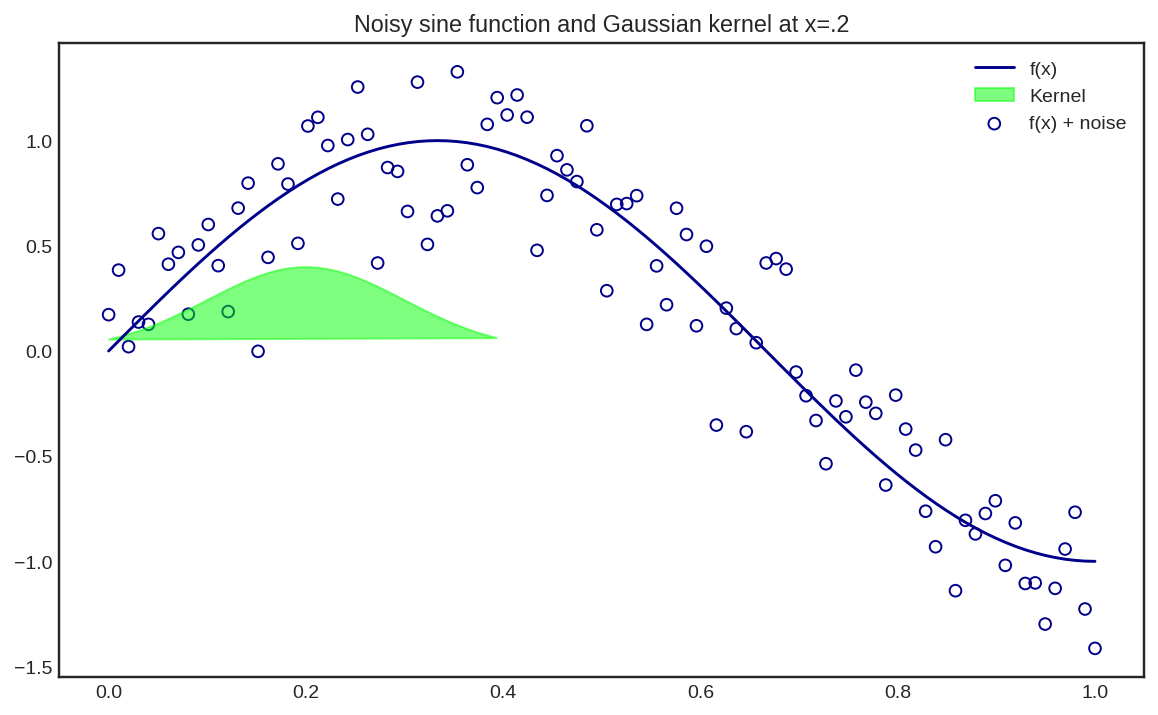

In [ ]:
#Initializing noisy non linear data
x = np.linspace(0,1,100)
noise = np.random.normal(loc = 0, scale = .25, size = 100)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = y + noise

#Plotting the noisy data and the Gaussian kerne; at around x = 0.2
plt.figure(figsize=(10,6))
plt.plot(x,y,color = 'darkblue', label = 'f(x)')
plt.scatter(x,y_noise, facecolors = 'none', edgecolor = 'darkblue', label = 'f(x) + noise')
plt.fill(x[:40],kernel_function(x[:40],0.2,Gaussian,.05), color = 'lime', alpha = .5, label = 'Kernel')
plt.legend()
plt.title('Noisy sine function and Gaussian kernel at x=.2')
plt.show()

# Example of the LOWESS algorithm written into Scikit-Learn complient function with application using the Computer Hardware dataset from UCI:

https://archive.ics.uci.edu/ml/datasets/Computer+Hardware

>Number of Instances: 209 

>Number of Attributes: 10 (6 predictive attributes, 2 non-predictive, 
1 goal field, and the linear regression's guess)

> Attribute Information:
   1. vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. Model Name: many unique symbols
   3. MYCT: machine cycle time in nanoseconds (integer)
   4. MMIN: minimum main memory in kilobytes (integer)
   5. MMAX: maximum main memory in kilobytes (integer)
   6. CACH: cache memory in kilobytes (integer)
   7. CHMIN: minimum channels in units (integer)
   8. CHMAX: maximum channels in units (integer)
   9. **PRP(prediction target): published relative performance (integer)**
  10. ERP: estimated relative performance from the original article (integer)


In [ ]:
# the following line(s) are necessary if you want to make SKlearn compliant functions
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

In [ ]:
lm = LinearRegression()
scale = StandardScaler()

In [ ]:
lm = LinearRegression()
scale = StandardScaler()

In [ ]:
machine_data =pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data', sep =',',names=['vendor','model','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP'])

In [ ]:
# This function uses the kernel to actually give us the weights
def weights_matrix(x,x_new,kern,tau):
  if np.isscalar(x_new):
    return kernel_function(x,x_new,kern,tau)
  else:
    n = len(x_new) # iterates through each observation of X
    return np.array([kernel_function(x,x_new[i],kern,tau) for i in range(n)])
    # the returned rows represent all the rows of weights corresponding to each observation in X

# Scikit-learn compliant function
####Main Idea: we want to define a model regressor that can be used as model.fit/model.predict, and that also allows sklearn GridSearchCV for tuning hyperparameters.

In [ ]:
class Lowess:
    def __init__(self, kernel = Gaussian, tau=0.05):
        self.kernel = kernel
        self.tau = tau
    
    def fit(self, x, y):
        kernel = self.kernel
        tau = self.tau
        self.xtrain_ = x
        self.yhat_ = y

    def predict(self, x_new): # this is where most of work happens
        check_is_fitted(self)
        x = self.xtrain_
        y = self.yhat_

        w = weights_matrix(x,x_new,self.kernel,self.tau) # gets the weights based on train and test data
        # Have to deal with 3 possible situtaions
        if np.isscalar(x_new): # if x_new is a scalar
          lm.fit(np.diag(w).dot(x.reshape(-1,1)),np.diag(w).dot(y.reshape(-1,1)))
          yest = lm.predict([[x_new]])[0][0]
        elif len(x.shape)==1: # if x_new is a single vector
          n = len(x_new)
          yest_test = np.zeros(n)
          #Looping through all x-points
          for i in range(n):
            lm.fit(np.diag(w[i,:]).dot(x.reshape(-1,1)),np.diag(w[i,:]).dot(y.reshape(-1,1)))
            yest_test[i] = lm.predict(x_new[i].reshape(-1,1))
            
        else: # if x_new is a matrix (multiple rows and cols)
          n = len(x_new)
          yest_test = np.zeros(n)
          #Looping through all x-points
          for i in range(n):
            lm.fit(np.diag(w[i,:]).dot(x),np.diag(w[i,:]).dot(y.reshape(-1,1)))
            yest_test[i] = lm.predict(x_new[i].reshape(1,-1))
        return yest_test

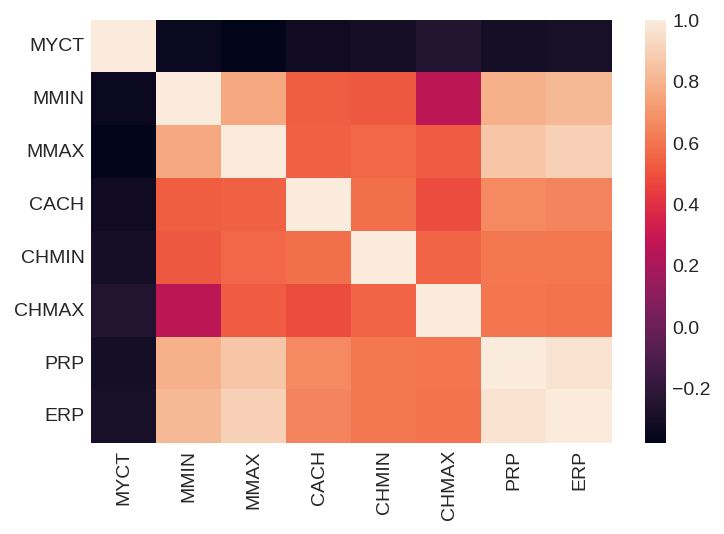

In [ ]:
import seaborn as sns
sns.heatmap(machine_data.corr())

In [ ]:
# we will use the "CACH", 'CHMIN" and "CHMAX" freatures as predictors
#CACH: cache memory in kilobytes (integer)
#CHMIN: minimum channels in units (integer)
#CHMAX: maximum channels in units (integer)

x = machine_data.loc[:,["MMAX","MMIN","CACH", "CHMIN", "CHMAX"] ].values
y =machine_data['PRP'].values

In [ ]:
kf = KFold(n_splits=10,shuffle=True,random_state=123)

In [ ]:
# with some tuning, the LOWESS regressor can be competitive with popular algorithms like RandomForest
mse_test_lowess = []
mse_test_rf = []
for idxtrain, idxtest in kf.split(x):
  xtrain = scale.fit_transform(x[idxtrain]) # need to scale the data for LOWESS
  xtest = scale.transform(x[idxtest])
  ytrain = y[idxtrain]
  ytest = y[idxtest]
  # for our 1-dimensional input data we do not need scaling
  model_lw = Lowess(kernel=Gaussian,tau= 0.87)
  model_rf = RandomForestRegressor(n_estimators=200,max_depth=5)
  model_lw.fit(xtrain,ytrain)
  model_rf.fit(xtrain,ytrain)
  mse_test_lowess.append(mse(ytest,model_lw.predict(xtest)))
  mse_test_rf.append(mse(ytest,model_rf.predict(xtest)))
print('The validated MSE for Lowess is : '+str(np.mean(mse_test_lowess)))
print('The validated MSE for Random Forest is : '+str(np.mean(mse_test_rf)))

The validated MSE for Lowess is : 3036.578607579189
The validated MSE for Random Forest is : 3030.5534574169856
